<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/nhan_dang_khuon_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(150,150,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [4]:
%cd '/content/drive/MyDrive/khuon_mat'

/content/drive/MyDrive/khuon_mat


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/khuon_mat/Training_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 192 images belonging to 3 classes.


In [6]:
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/khuon_mat/Test_set',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 42 images belonging to 3 classes.


In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(training_set,epochs = 25,validation_data=test_set,verbose = 1)

Epoch 1/25
6/6 [==============================] - 144s 22s/step - loss: 1.1932 - accuracy: 0.4896 - val_loss: 0.9742 - val_accuracy: 0.4524
Epoch 2/25
6/6 [==============================] - 24s 4s/step - loss: 0.6952 - accuracy: 0.7656 - val_loss: 0.5455 - val_accuracy: 0.6667
Epoch 3/25
6/6 [==============================] - 24s 4s/step - loss: 0.3972 - accuracy: 0.8750 - val_loss: 0.1281 - val_accuracy: 0.9762
Epoch 4/25
6/6 [==============================] - 26s 5s/step - loss: 0.2997 - accuracy: 0.8854 - val_loss: 0.2392 - val_accuracy: 0.9286
Epoch 5/25
6/6 [==============================] - 23s 4s/step - loss: 0.2544 - accuracy: 0.9010 - val_loss: 0.0952 - val_accuracy: 1.0000
Epoch 6/25
6/6 [==============================] - 26s 4s/step - loss: 0.1024 - accuracy: 0.9792 - val_loss: 0.2348 - val_accuracy: 0.8333
Epoch 7/25
6/6 [==============================] - 23s 4s/step - loss: 0.0951 - accuracy: 0.9635 - val_loss: 0.6099 - val_accuracy: 0.7381
Epoch 8/25
6/6 [================

In [9]:
from keras.models import load_model
model.save('Final.h5')
model_CNN = load_model('Final.h5')

In [11]:
training_set.class_indices

{'Danh': 0, 'Nhan': 1, 'Phap': 2}

1/1 [==============================] - 0s 30ms/step


array([1])

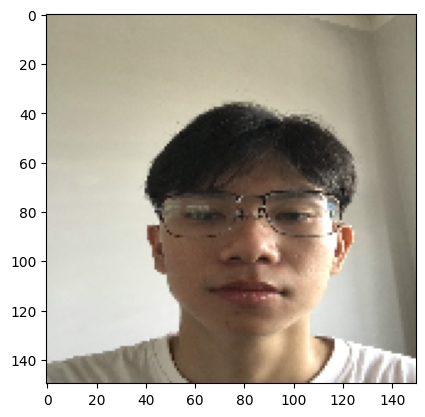

In [12]:
from tensorflow.keras.utils import load_img, img_to_array
from numpy import argmax
import matplotlib.pyplot as plt 
import numpy as np 
img = load_img('/content/drive/MyDrive/khuon_mat/val/Nhan.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

1/1 [==============================] - 0s 25ms/step


array([2])

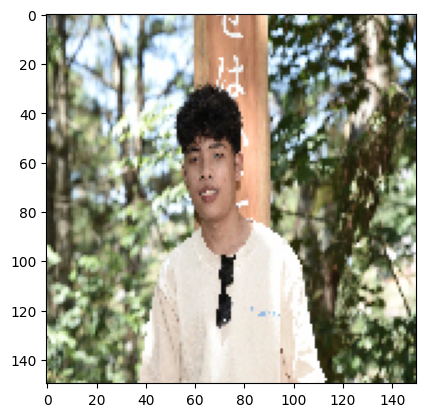

In [13]:
from tensorflow.keras.utils import load_img, img_to_array
from numpy import argmax
import matplotlib.pyplot as plt 
import numpy as np 
img = load_img('/content/drive/MyDrive/khuon_mat/val/Phap (12).JPG',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)

1/1 [==============================] - 0s 22ms/step


array([0])

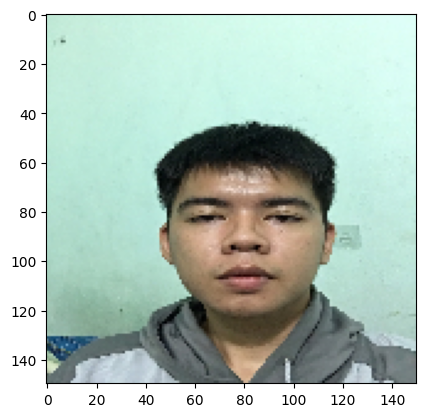

In [14]:
from tensorflow.keras.utils import load_img, img_to_array
from numpy import argmax
import matplotlib.pyplot as plt 
import numpy as np 
img = load_img('/content/drive/MyDrive/khuon_mat/val/Danh (53).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model_CNN.predict(img),axis=1)